### SHORT VERSION
# Introduction to data science: regression

Classification is all about predicting discrete classes, but sometimes we want to predict quantities &mdash; continuous numerical properties with magnitude, like temperature or time.

As before, we want to select the best (i.e. optimal) model -- and, as before, this means having an objective measure of 'best' and a way to prove that you have found it. 

First we'll import some data. Again, I'm using an extract from [the Rock Property Catalog](https://subsurfwiki.org/wiki/Rock_Property_Catalog).

In [1]:
import pandas as pd

df = pd.read_excel('https://github.com/scienxlab/datasets/raw/refs/heads/main/rpc/3-lithologies-imputed.xlsx')

df.head()

,Rho,Vp,Vs,Lithology
0,2.71,4953.66,2957.26,shale
1,2.68,3444.66,2318.00,shale
2,2.56,3507.80,2218.53,shale
3,2.60,2988.89,1633.33,shale
4,2.46,3642.00,2221.00,shale


Let's select a column as `X` (input) and a `y` (target).

In [2]:
X = df[['Vp']].values
y = df['Vs'].values

## Plot the data

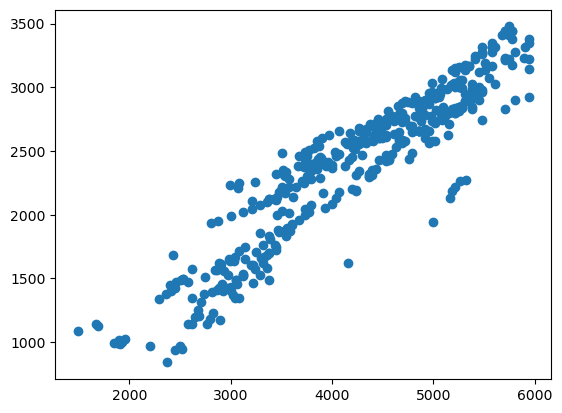

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

---
## Ridge regression

**Linear regression** is a reliable regressor. The 'vanilla' algorithm does not include any regularization, which is sometimes what you want. But we will use regularization from the start, because you will often want to apply it &mdash; and it gives me the chance to talk about regularization and hyperparameter tuning in general.

In [4]:
from sklearn.linear_model import Ridge

est = Ridge()

est.fit(X, y)

y_pred = est.predict(X)

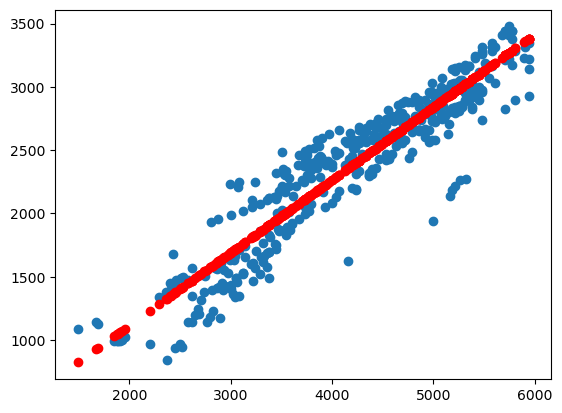

In [5]:
plt.scatter(X, y)
plt.scatter(X, y_pred, c='r')

### Plot a line

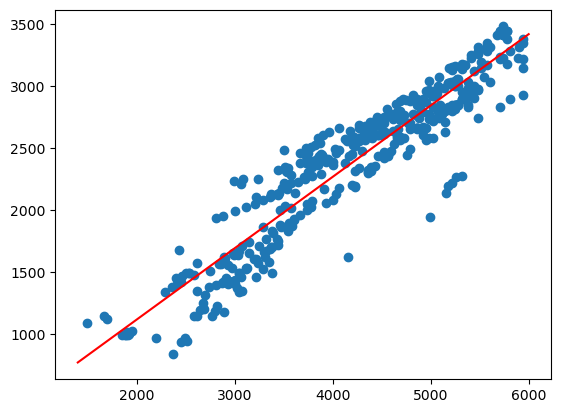

In [6]:
import numpy as np

X_model = np.linspace(1400, 6000).reshape(-1, 1)
y_model = est.predict(X_model)

plt.scatter(X, y)
plt.plot(X_model, y_model, 'r')

Recall that we are fitting a model like:

$$ \Large \hat{y} = w x + b $$

We can ask for the gradient ($w$) and the intercept ($b$) of the line:

In [7]:
est.coef_, est.intercept_

(array([0.57508454]), -34.59424094988481)

**❓ How can we measure the quality of this prediction?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

In [8]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.8801226884491147

**❓ What do we think? Are we satisfied?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

## Scoring

Scores matter in all machine learning tasks. It is very common to see people reporting only **R<sup>2</sup>** for regression tasks, or only **accuracy** for classification tasks. But it is almost never enough to only look at (or report) the 'obvious' score.

The **mean squared error** was used for the optimization, but its square root, **RMS error**, is often easier to interpret because it has the same units as the original quantity.

In [9]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mean_squared_error(y, y_pred), root_mean_squared_error(y, y_pred)

(46495.42673933511, 215.62798227348674)

The **mean absolute error** may be even more intuitive, especially if we feel like negative and positive errors cancel each other out.

In [10]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred)

172.85131389935927

Let's make ourselves a small report.

In [11]:
def report(y, y_pred):
    print(f"R²: {r2_score(y, y_pred):.4f}", end='    ')
    print(f"RMSE: {root_mean_squared_error(y, y_pred):.1f}", end='    ')
    print(f"MAE: {mean_absolute_error(y, y_pred):.1f}")
    return

report(y, y_pred)

R²: 0.8801    RMSE: 215.6    MAE: 172.9


---

## Assumptions of regression

Along with these metrics, it's essential to inspect the residuals to ensure that they are:

- Approximately normally distributed.
- Not correlated with the inputs or output.
- Homoskedastic (the variance is not correlated with inputs or output).

These conditions are assumptions of Gauss–Markov theorem, which underlies linear regression.

<Axes: ylabel='Density'>

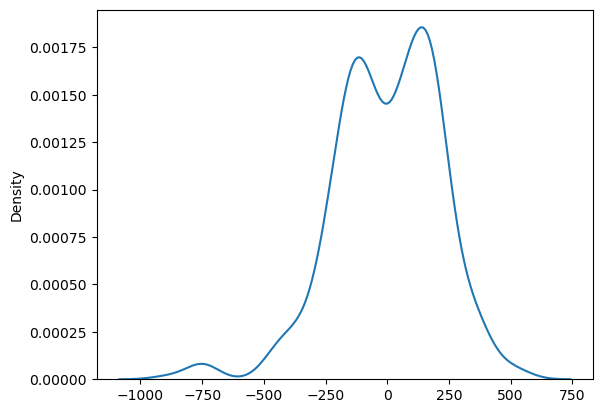

In [12]:
import seaborn as sns

sns.kdeplot(y - y_pred)

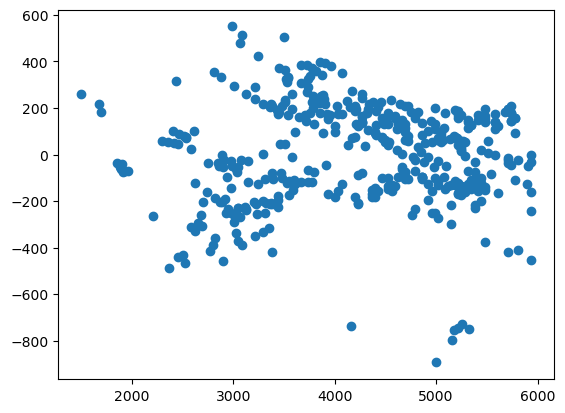

In [13]:
plt.plot(X, y - y_pred, 'o')

---

## Fair evaluation

Now that we have an evaluation criterion, we need to address another issue: fairness. Our test was not fair.

We should not train the model then check its accuracy only on that same training dataset. It's cheating, because in the future we'd like to predict on data that the model has never seen. So we should test the model on data it has never seen.

Let's hold out some validation data, or 'blind' data.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((330, 1), (330,), (110, 1), (110,))

### EXERCISE

Now let's train a model _on only the training data_ and validate it properly _on only the test data_.

**❓ Do we think the score will be better or worse than before?**

In [16]:
est = Ridge()

est.fit( X_train, y_train )  # Replace the dots with the training data.

y_pred = est.predict( X_test )  # What will we predict on?

report( y_test, y_pred )  # What do we give the report function?

R²: 0.8890    RMSE: 209.2    MAE: 170.9


Was: `R²: 0.8801    RMSE: 215.6    MAE: 172.9`

**❓ What do we need to think about when splitting? In other words: what is the most important thing about the test data?**

&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />

First and foremost, the test data must look like data we expect in the future.

We also need to think about:

- Independence: can you shuffle the data wthout losing information?
- Identical distributions: are all the data from the same distribution?
- Reproducibility: what can we do to make this reproducible?

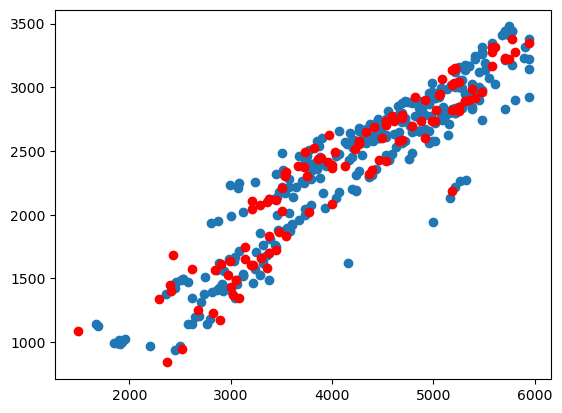

In [17]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c='r')

## How are we doing?

Let's check the model against the test data only.

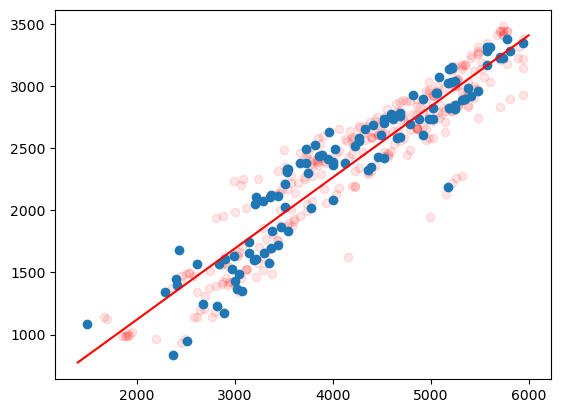

In [18]:
y_model = est.predict(X_model)

plt.scatter(X_train, y_train, c='r', alpha=0.1)
plt.scatter(X_test, y_test)
plt.plot(X_model, y_model, 'r')

**❓ What could we do to improve this prediction?**

&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />

Quite a few things!

- We have another log: we could use the density as well.
- We have lithology, we could use that as well.
- We could think about whether we need to preprocess the data in any way.
- We could add nonlinear transformations and combinations of the features.
- We could tune the hyperparameter of the model, `alpha`.
- We could try other models.

🕑 If we have time, we can try some of these things.

---

## More features

We also have the rock density, `Rho`, let's use that. Now the model will be like:

$$ \Large \hat{y} = w_0 x_0 + w_1 x_1 + b $$

In [19]:
X = df[['Vp', 'Rho']].values
y = df['Vs'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

est = Ridge()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

report(y_test, y_pred)

R²: 0.8616    RMSE: 210.5    MAE: 165.7


Was originally:

`R²: 0.8801    RMSE: 215.6    MAE: 172.9`

One downside is that it is now a bit harder to draw than it was. but we won't fix it as it's just about to get worse...

---
## Non-linearity

Linear regression is linear **in the parameters**, but we can model non-linear relationships in the data by adding non-linear transformations of the data. In particular, we will add the squares of the features, and the **interactions** of the features (their products, basically).

We can do this with **polynomial expansion** as follows:

In [20]:
X[:10]

array([[4.95366e+03, 2.71000e+00],
       [3.44466e+03, 2.68000e+00],
       [3.50780e+03, 2.56000e+00],
       [2.98889e+03, 2.60000e+00],
       [3.64200e+03, 2.46000e+00],
       [4.98707e+03, 2.71000e+00],
       [4.39576e+03, 2.51000e+00],
       [3.81902e+03, 2.63000e+00],
       [3.03333e+03, 2.60000e+00],
       [2.40274e+03, 2.35000e+00]])

In [21]:
from sklearn.preprocessing import PolynomialFeatures

np.set_printoptions(precision=3)

poly = PolynomialFeatures(2, include_bias=False)
X_ = poly.fit_transform(X)
X_

array([[4.954e+03, 2.710e+00, 2.454e+07, 1.342e+04, 7.344e+00],
       [3.445e+03, 2.680e+00, 1.187e+07, 9.232e+03, 7.182e+00],
       [3.508e+03, 2.560e+00, 1.230e+07, 8.980e+03, 6.554e+00],
       ...,
       [5.446e+03, 2.570e+00, 2.966e+07, 1.400e+04, 6.605e+00],
       [5.348e+03, 2.440e+00, 2.860e+07, 1.305e+04, 5.954e+00],
       [5.348e+03, 2.570e+00, 2.860e+07, 1.374e+04, 6.605e+00]])

Now we have:

$$ \Large \hat{y} = w_0 x_0 + w_1 x_1 + w_2 x_0^2 + w_3 x_0 x_1 + w_4 x_1^2 + b $$

So the model will have six parameters.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=42)

est = Ridge()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

report(y_test, y_pred)

R²: 0.8655    RMSE: 207.5    MAE: 163.1


/Users/MTHA/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.78552e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Was previously:

`R²: 0.8616    RMSE: 210.5    MAE: 165.7`

Let's look at the coefficients now.

In [23]:
est.coef_, est.intercept_

(array([ 7.853e-01,  8.752e+01, -1.314e-05, -5.906e-02,  1.347e+02]),
 -1087.8780456294153)

**❓ Big coefficient means big effect, right? Can we interpret these as importances?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

---

## Scale matters

Let's look at the first few rows of the data (before expansion):

In [24]:
X[:5]

array([[4.954e+03, 2.710e+00],
       [3.445e+03, 2.680e+00],
       [3.508e+03, 2.560e+00],
       [2.989e+03, 2.600e+00],
       [3.642e+03, 2.460e+00]])

The units of these columns are m/s and g/cm<sup>3</sup>, which have very different magnitudes for rocks.

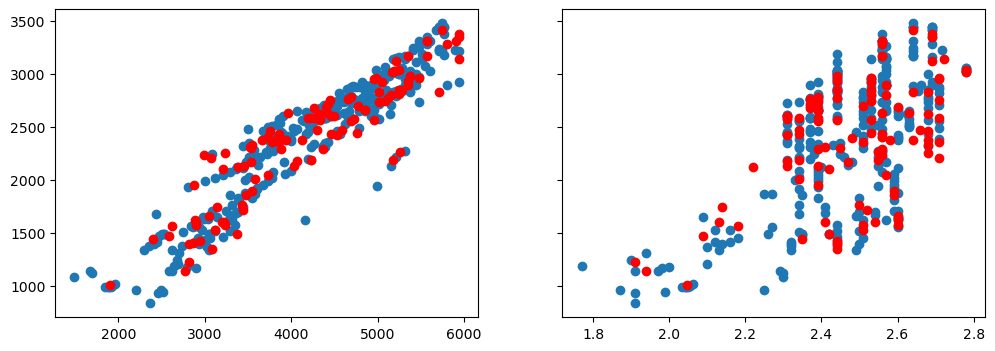

In [25]:
fig, (axl, axr) = plt.subplots(figsize=(12, 4), ncols=2, sharey=True)
axl.plot(X_train[:, 0], y_train, 'o')
axl.plot(X_test[:, 0], y_test, 'ro')
axr.plot(X_train[:, 1], y_train, 'o')
axr.plot(X_test[:, 1], y_test, 'ro')

We're really only interested in the _distributions_ of the data:

<Axes: ylabel='Density'>

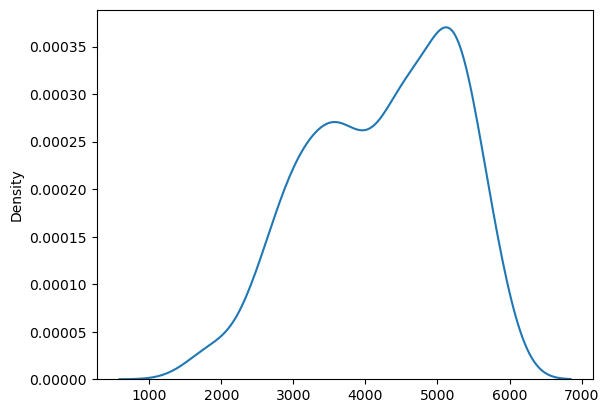

In [26]:
import seaborn as sns

sns.kdeplot(X[:, 0])

## Standardize the data

It's essential to train some machine learning algorithms on scaled data, for example on the Z-scores of your data, i.e. zero mean, unit variance. This ensures that the different scales of the features is not causing a problem.

For features distributed uniformly, or with strong min/max constraints, another strategy like normalization (e.g. in (0, 1) or (-1, 1)) might be better.

**❓ Standardization needs the mean and variance of the data... which dataset shall we measure these stats on?**

<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;<br />&nbsp;

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)  # Important!

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

This doesn't change how the data are distributed:

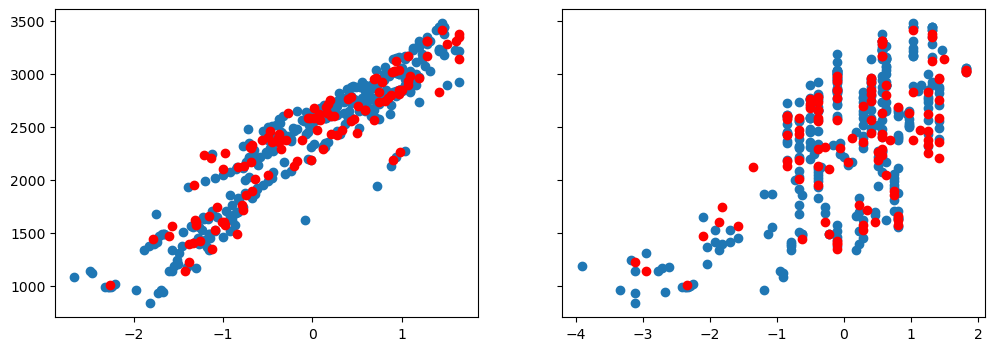

In [28]:
fig, (axl, axr) = plt.subplots(figsize=(12, 4), ncols=2, sharey=True)
axl.plot(X_train_sc[:, 0], y_train, 'o')
axl.plot(X_test_sc[:, 0], y_test, 'ro')
axr.plot(X_train_sc[:, 1], y_train, 'o')
axr.plot(X_test_sc[:, 1], y_test, 'ro')

/Users/MTHA/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Density'>

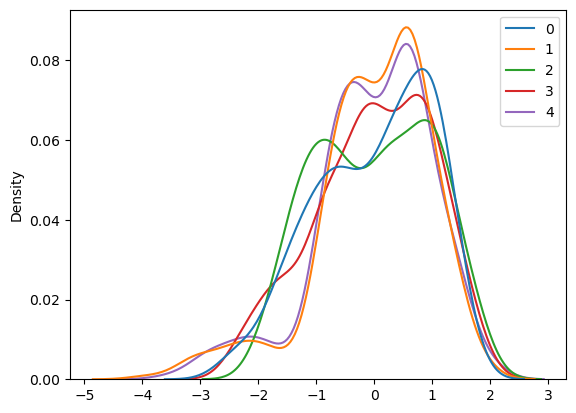

In [29]:
import seaborn as sns

sns.kdeplot(X_train_sc)

Now we can re-fit the model and look at the scores.

In [30]:
est = Ridge()
est.fit(X_train_sc, y_train)
y_pred = est.predict(X_test_sc)

report(y_test, y_pred)

R²: 0.8629    RMSE: 209.6    MAE: 163.1


Was:

`R²: 0.8655    RMSE: 207.5    MAE: 163.1`


The quality of the prediction does not change much, but the coefficients are more interesting:

In [31]:
est.coef_, est.intercept_

(array([ 503.495,  220.327,  -75.988,  137.804, -153.592]), 2407.0909090909076)

Note that some people think you should not interpret the coefficients of the regularized model.

### Should you scale the target?

I have not been able to get a clear answer on this, but in my experience it makes no difference except with neural networks (the reason being that large error values may not backpropagate properly during training).

### Be careful!

Solving one problem gives us a new one. It is now essential to scale the data now before inference -- although the model will happily make (terrible) predictions.

In [32]:
X_train[0]

array([4.790e+03, 2.570e+00, 2.294e+07, 1.231e+04, 6.605e+00])

In [33]:
est.predict([X_train[0]])

array([-1.739e+09])

This is known as an "out of distribution" or OOD error, and it's a classic pitfall in machine learning.

---

## Put everything in a pipeline

This is the most flexible way to compose data pipelines in `sklearn`. It is better than implementing everything individually in a stepwise manner.

For now, it won't change anything.

In [34]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), Ridge())

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

report(y_test, y_pred)

R²: 0.8629    RMSE: 209.6    MAE: 163.1


## Hyperparameter tuning

It is sensible to use cross-validation when tuning hyperparameters. Using the test data for tuning will overfit to the train-test split.

In [35]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

df_train, df_test = train_test_split(df, stratify=df['Lithology'], random_state=42)

pipe = make_pipeline(StandardScaler(), Ridge())
skf = StratifiedKFold().split(X_train, df_train['Lithology'])

cross_validate(pipe,
               X_train, y_train,
               scoring='neg_root_mean_squared_error',
               cv=skf,
               return_train_score=True,
              )

{'fit_time': array([0.003, 0.003, 0.003, 0.002, 0.002]),
 'score_time': array([0.001, 0.002, 0.002, 0.001, 0.001]),
 'test_score': array([-174.994, -166.557, -229.775, -197.212, -214.481]),
 'train_score': array([-201.256, -203.32 , -187.773, -195.938, -190.975])}

Now we can use a loop to try lots of different values of `alpha`:

In [36]:
alphas = np.logspace(-4, 2, 13)
alphas

array([1.000e-04, 3.162e-04, 1.000e-03, 3.162e-03, 1.000e-02, 3.162e-02,
       1.000e-01, 3.162e-01, 1.000e+00, 3.162e+00, 1.000e+01, 3.162e+01,
       1.000e+02])

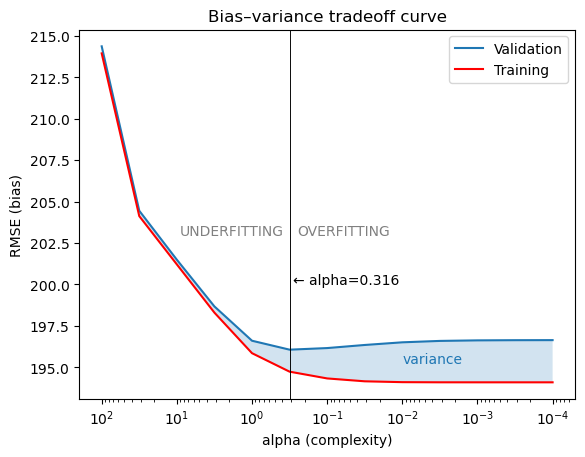

In [37]:
mean_val, mean_train = [], []
for alpha in alphas:
    pipe = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    skf = StratifiedKFold().split(X_train, df_train['Lithology'])
    cross_val = cross_validate(pipe, X_train, y_train, scoring='neg_root_mean_squared_error', cv=skf, return_train_score=True)
    mean_val.append(-np.mean(cross_val['test_score']))
    mean_train.append(-np.mean(cross_val['train_score']))

alpha_opt = alphas[np.argmin(mean_val)]

plt.plot(alphas, mean_val, label='Validation')
plt.plot(alphas, mean_train, c='r', label='Training')
plt.fill_between(alphas, mean_val, mean_train, alpha=0.2)
plt.xlabel('alpha (complexity)')
plt.ylabel('RMSE (bias)')
plt.xscale('log')
plt.title('Bias–variance tradeoff curve')
plt.axvline(alpha_opt, c='k', lw=0.67)
plt.text(0.9*alpha_opt, 200, f"← alpha={alpha_opt:.3f}")
plt.text(1.2*alpha_opt, 203, f"UNDERFITTING", horizontalalignment='right', c='gray')
plt.text(0.8*alpha_opt, 203, f"OVERFITTING", horizontalalignment='left', c='gray')
plt.text(1e-2, 195.5, f"variance", verticalalignment='center', c='C0')
plt.legend()
plt.gca().invert_xaxis()

This curve is well known in the field of machine learning. It's called the **bias–variance trade-off curve** and I think it makes the most sense when the axes are labeled as shown. _Bias_ is basically 'error', and the shaded area is called _variance_.

---
## Categorical features

Turns out the different lithologies have quite different rock physics characteristics. It makes a lot of sense to account for this in the model. You might think you want to train a different model for each lithology, but this is not necessary. It is sufficient to introduce the lithology variable into `X`, using 'dummy encoding'. 

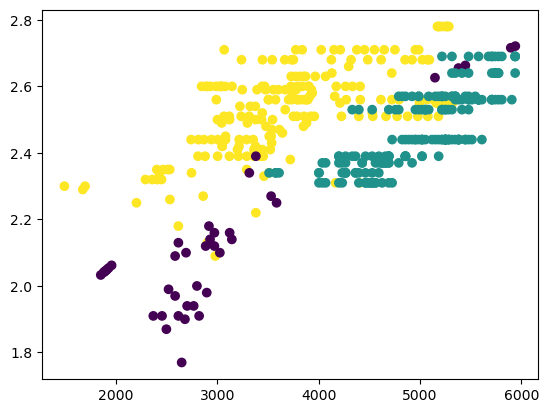

In [38]:
import matplotlib.pyplot as plt

LITHS = ['limestone', 'dolomite', 'shale']

def lith_index(y):
    return [LITHS.index(lith) for lith in y]

plt.scatter(*X.T, c=lith_index(df['Lithology']))

For more on how to do this, check out [this notebook](https://github.com/agilescientific/geocomputing/blob/develop/prod/Linear_regression.ipynb), and look for the **Take lithology into account** section.

---

## Carry on exploring!

- How can you add Lithology to the features? Would it improve the prediction quality?
- Choose another algorithm to try a prediction with, and implement it in a pipeline. For example, try KNN.
- Choose a hyperparameter of the new algorithm and tune it. (If you have done this kind of thing before, try tuning 2 or 3 hyperparameters with grid or random search.)

## Test

When you have tuned the predictor and are satisfied that it is as good as it can be, you can test against the holdout set.

In [39]:
alpha_opt = alphas[np.argmin(mean_val)]

pipe = make_pipeline(StandardScaler(), Ridge(alpha=alpha_opt))

pipe.fit(X_train, y_train)
                    
y_pred = pipe.predict(X_test)

report(y_test, y_pred)

R²: 0.8637    RMSE: 208.9    MAE: 162.5


Was:

`R²: 0.8822    RMSE: 214.1    MAE: 161.9`

Remember we said the residuals should meet certain conditions? Let's check them again:

<Axes: ylabel='Density'>

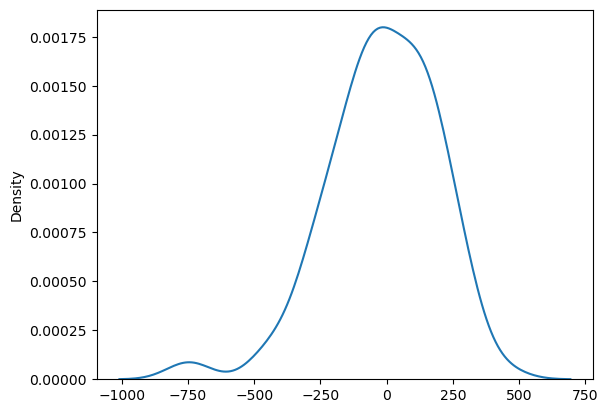

In [40]:
sns.kdeplot(y_test - y_pred)

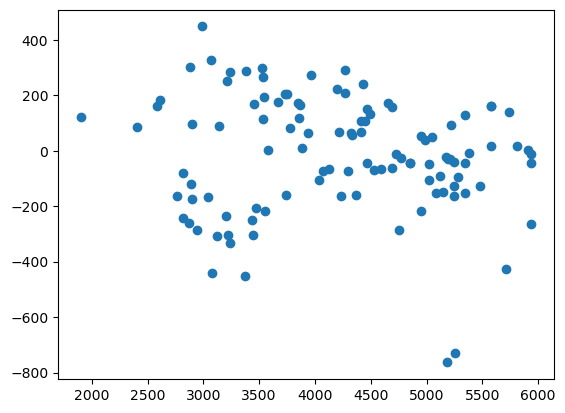

In [41]:
plt.plot(X_test[:, 0], y_test - y_pred, 'o')

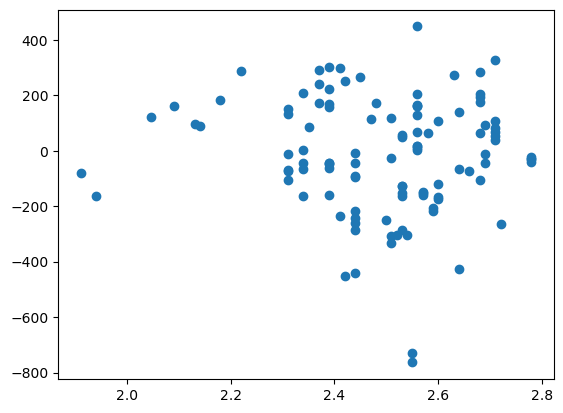

In [42]:
plt.plot(X_test[:, 1], y_test - y_pred, 'o')

If you are satisfied (think hard about what this means... you really have to decide before you start the model fitting process) then you are ready to fit the final model. If not, you must start all over again.

## Using this model

We do not want to use this model &mdash; if we like its performance then we should now retrain it on all the data. Presumably, this new model will be at least as good as the one trained on the training set, we just don't have a way to check it now 😬

In [43]:
scaler = StandardScaler().fit(X_)
X_sc = scaler.transform(X_)
est = Ridge(alpha=alpha_opt).fit(X_sc, y)

There is no way for us to test this model, but we should monitor it in production.

---

## Takeaways

There are lots, but here are a few.

- **Machine learning is programming.** For now, for science and engineering applications, there is no way around this. Automatic machine learning is not a thing, at least not yet, not for us.
- **Learn about the algorithms you apply.** For linear regression, you need to know about its cost function, its assumptions, and regularization.
- **Give a lot of thought to how to fairly test your model.** Start by thinking about how it will be applied
- **Scale your features.** It never hurts and sometimes it's essential.
- **Use polynomial expansion on regression tasks.** It will lmost always improve your model.
- **Use pipelines in `sklearn`.** You will avoid a lot of headaches and gotchas with preprocessing your data.
- **Use regularization.** It usually makes sense for predictive applications, but make sure you understand how it works and note that L2 ('ridge') regularization may not be the best strategy for your application.
- **Use appropriate measures of performance.** For example, make sure your metrics are compatible with the loss function.
- **Check the assumptions of linear regression hold for your solution.**

---
&copy; 2025 Matt Hall / Equinor CC BY